## 第三章 线性模型

### 基本形式

给定示例 $\mathbf x=(x_1,\dots,x_d)^T$，其中$x_i$是第$i$个属性的取值，响应变量记为$y$,则我们希望通过线性组合来进行预测函数： 

$$f(\mathbf x)=\mathbf w^T\mathbf x + w_0$$

线性模型简单易于建模与解释，许多非线性模型可以在线性模型的基础上，引入层级结构或高维映射得到。

### 线性回归 linear regression

给定数据集$D=\{(\mathbf x_1,y_1),\dots, (\mathbf x_n,y_n)\}$,我们希望采用一个好的$f$来对D进行建模，如何衡量好坏就需要定义损失函数。在连续数值的情况下一般采用均方误差，极小化该损失来求得f中的参数,简称**最小二乘法**，<u>意义便是使所有的样本点到f的欧氏距离之和最小</u>。其中 $\mathbf w := (w_0,\mathbf w)$，$\mathbf {X=(1,x_1,\dots,x_d)}$

$$\hat{w} = \arg_w \min (\mathbf{(y-Xw)^T(y-Xw)})$$    


#### 损失函数--最小二乘

其中损失函数记为$E_w=\mathbf{(y-Xw)^T(y-Xw)}$,该损失函数是下凹函数，因为其二阶导为二次型一直大于0，为此存在最小值，只需要对于求导令等于0即可，即$\mathbf{w^{\star}=(X^TX)^{-1}X^Ty}$。很容易推导出该损失函数在马尔科夫正态性假设下，与MLE是一致的，并且可以证明其为无偏估计，也可以得到相应的估计量的方差。

**广义线性模型**：基于指数函数族的假设给出的线性模型，其中需要定义连接函数，$y=g^{-1}(\mathbf w^T\mathbf x + w_0)$.

### 对数几率回归

**对数几率函数**logistic function: $y=\frac{1}{1+e^{-z}}$, Sigmoid函数，在0附近很陡。变换可得

$$\ln \frac{y}{1-y}=\mathbf w^T\mathbf x + w_0$$

无需先假设分布，能够预测出概率，得到的似然函数为任意阶可导凸函数。记$\pi_i=p(y_i=1|\mathbf x_i)=\frac{e^{\mathbf w^T\mathbf x_i}}{1+e^{\mathbf w^T\mathbf x_i}}$,则$p(y_i|\mathbf x_i;\mathbf w)=\pi_i^{y_i}(1-\pi_i)^{1-y_i}$
故有对数似然函数：

$$l(\mathbf w)=\sum_{i=1}^m (y_i\ln \pi_i + (1-y_i)\ln (1-\pi_i))=
\sum_{i=1}^m y_i\mathbf w^T \mathbf x - \ln(1+e^{\mathbf x^T\mathbf x})$$

采用牛顿法，梯度下降求其最有解，牛顿法如下：

$$\mathbf w^{t+1}=\mathbf w^t - (\frac{\partial^2 l(\mathbf w)}{\partial\mathbf w \partial\mathbf w^T})^{-1}\frac{\partial l(\mathbf w)}{\partial\mathbf w}$$

其中
$$\frac{\partial l(\mathbf w)}{\partial\mathbf w}=\sum_{i=1}^m \mathbf x_i (y_i-\hat{\pi}_i)$$,
$$\frac{\partial^2 l(\mathbf w)}{\partial\mathbf w \partial\mathbf w^T}=-\sum_{i=1}^m \mathbf x_i^T\mathbf x_i \hat{\pi}_i(1-\hat{\pi}_i)
$$

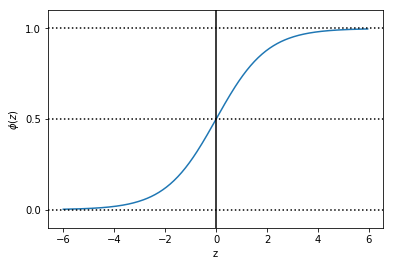

In [2]:
import matplotlib.pyplot as plt
import numpy as np
 
 
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
 
 
if __name__ == '__main__':
    z=np.arange(-6, 6, 0.05)
    plt.plot(z, sigmoid(z))
    plt.axvline(0.0, color='k')
    plt.axhline(y=0.0, ls='dotted', color='k')
    plt.axhline(y=1.0, ls='dotted', color='k')
    plt.axhline(y=0.5, ls='dotted', color='k')
    plt.yticks([0.0, 0.5, 1.0])
    plt.ylim(-0.1, 1.1)
    plt.xlabel('z')
    plt.ylabel('$\phi (z)$')
    plt.show()

## 线性判别分析 LDA

**朴素思想**：将样例投影到直线上，使组内样本方差尽可能小，而组间样本方差尽可能大。

![](Figures/LDA.png)

根据投影的定义有，两类的均值向量与协方差向量$\mu_0, \mu_1, \Sigma_0, \Sigma_1$,则投影后的中心为$w^T\mu_0, w^T\mu_1, w^T\Sigma_0w,w^T\Sigma_1w$,均为实数。为使中心距离尽可能大，而样例投影后的协方差小，考虑如下目标函数：

$$J=\frac{||w^T\mu_0-w^T\mu_1||_2^2}{w^T\Sigma_0 w+ w^T\Sigma_1w}=
\frac{w^T(\mu_0-\mu_1)^T(\mu_0-\mu_1)w}{w^T(\Sigma_0+\Sigma_1)w}$$,

其中$S_w=\Sigma_0+\Sigma_1=\sum_{i=0,1}\sum_{x\in X_i}(x-\mu_i)(x-\mu_i)^T$为类内矩阵散度,$S_b=(\mu_0-\mu_1)(\mu_0-\mu_1)^T$ 为类间矩阵散度。

由于分子分母皆为w的二次项，因此其解与其长度无关（另$w'=cw$带入测试即可），为此极大化上式，等价于

$$\min_w \quad -w^TS_bw, \qquad s.t.\quad w^TS_ww=1$$

使用拉格朗日乘子法有，$S_bw=\lambda S_w w$,其中$S_bw=(\mu_0-\mu_1)(\mu_0-\mu_1)^Tw:= c\lambda (\mu_0-\mu_1)$,故联合有$w=cS_w^{-1}(\mu_0-\mu_1)$。(我们只关心w的方向，c可以任意选择)

考虑数值稳定性，通常是对$S_w$做奇异值分解，然后求其逆矩阵。[*LDA可以从贝叶斯的理论角度阐述，并证明当两类数据同先验，满足高斯分布且协方差相等时，LDA达到最优分类*](https://blog.csdn.net/zhfplay/article/details/86777238)

LDA推广到多分类任务中。由于LDA通过投影减小了样本点的维数，且使用了类别信息，常被视为一种经典的监督降维技术[[1]](https://blog.csdn.net/u012679707/article/details/80529252)。

## 多分类学习

N 个类别一般是拆分为若干个二分类问题求解：一对一，一对其余，多对多。

- 一对一，是任意两两配对进行二分类，然后采用投票方式；
- 一对其余，一个对剩余的进行二分类，每次使用了全部样本，虽然比一对一节省存储开销和时间，但是当类别很多事，一对一的训练反而时间开销更小；
- 多与多，并不是随意选取，[**纠错输出码**](http://www.docin.com/p-1473880218.html)

## 类别不平衡问题 class-imbalance

**在缩放**rescaling： 将$\frac{y}{1-y}>1 判断为正$，改为$\frac{y}{1-y}>\frac{m^+}{m^-},为正$，其思想是训练集真实样本总体的无偏采样。

- 欠采样，去除多的样例，使得正反数目接近，丢失信息，可以利用集成学习机制对每个学习器都欠采样。
- 过采样，增加少的样例，使得正反数目接近，不能简单的重复采样而导致过拟合，代表算法SMOTE
- 阈值移动，threshold-moving，使用在缩放变换。

## 阅读材料

**稀疏表示**，其本质是$L_0$范数的优化，但在通常条件下是NP问题，LASSO采用L1范数近似L0范数。
**多分类学习$\neq$ 多标记学习**，将某样例标记为多个类别。

## 习题